<a href="https://colab.research.google.com/github/Italoalberto/IA-ENAP/blob/main/VA05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso fictício: Secretaria de processos administrativos do Governo de Minas Gerais

In [1]:
# Instalar a biblioteca 'transformers' para processamento de linguagem natural e modelos de linguagem
!pip install transformers
# Instalar a biblioteca 'pytesseract' para reconhecimento óptico de caracteres (OCR) usando o Tesseract
!pip install pytesseract
# Instalar o pacote Tesseract OCR, uma ferramenta de OCR de código aberto
!apt-get install tesseract-ocr
# Instalar a biblioteca 'networkx' para criação, manipulação e estudo da estrutura, dinâmica e funções de grafos complexos
!pip install networkx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.5 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123588 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [2]:
# Importar dependências
from transformers import BlipProcessor, BlipForConditionalGeneration
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# Importar a biblioteca necessária para acessar o Google Drive no Google Colab
from google.colab import drive
# Montar o Google Drive no diretório da sua máquina para que os arquivos armazenados no Drive possam ser acessados no Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Função para extrair texto de uma imagem usando OCR
def extract_text_from_image(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    return text

In [5]:
# Função para analisar fluxogramas e diagramas
def analyze_flowchart(image_path):
    # Extrair texto da imagem
    text = extract_text_from_image(image_path)

    # Carregar o modelo e o processador BLIP
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    # Abrir a imagem e processar com o modelo multimodal
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, text, return_tensors="pt")

    # Gerar análise do fluxograma
    out = model.generate(**inputs, max_length=50)
    analysis = processor.decode(out[0], skip_special_tokens=True)

    return analysis

In [6]:
# Função para desenhar o fluxograma e identificar gargalos (simplificado)
def draw_and_identify_bottlenecks(image_path):
    G = nx.DiGraph()

    # Adicionar nós e arestas ao grafo (exemplo simplificado)
    G.add_edges_from([
        ("Início", "Passo 1"),
        ("Passo 1", "Passo 2"),
        ("Passo 2", "Decisão"),
        ("Decisão", "Passo 3"),
        ("Decisão", "Passo 4"),
        ("Passo 3", "Fim"),
        ("Passo 4", "Fim")
    ])

    # Desenhar o grafo
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', arrows=True)
    plt.show()

    # Identificar gargalos (exemplo simplificado)
    bottlenecks = ["Passo 2", "Decisão"]
    return bottlenecks

### Imagem exemplo utilizada neste experimento:

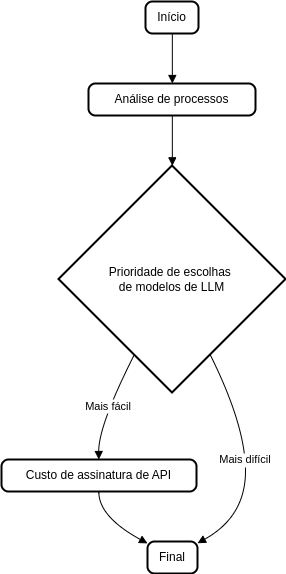

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

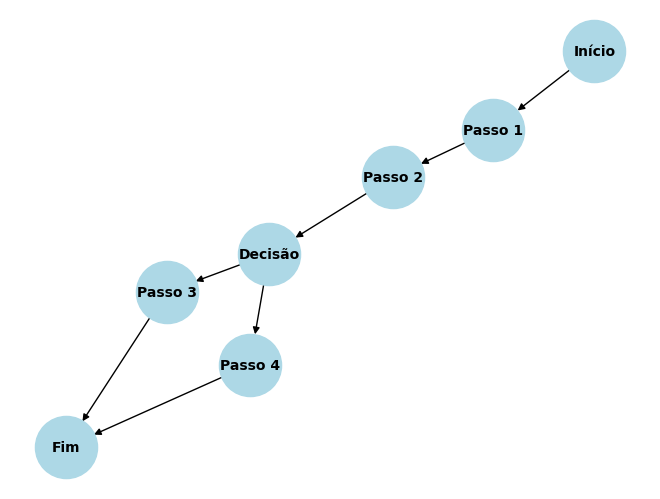

In [7]:
# Exemplo de análise de fluxograma
image_path = "/content/drive/MyDrive/__Colab Notebooks/_ENAP/Diagrama.png"  # Caminho para a imagem do fluxograma (no seu computador vai ter um caminho diferente correspondente ao local que a imagem vai estar armazenada)
analysis = analyze_flowchart(image_path)
bottlenecks = draw_and_identify_bottlenecks(image_path)

In [8]:
# Imprime a análise do fluxograma realizada
print("Análise do Fluxograma:", analysis)
# Imprime os gargalos identificados no processo
print("Gargalos Identificados:", bottlenecks)

Análise do Fluxograma: analise de processos prioridade de escolhas de modelos de llm mais faci mais dificil custo de assinatura de api
Gargalos Identificados: ['Passo 2', 'Decisão']
